<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу-1" data-toc-modified-id="Выводы-по-разделу-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по разделу 1</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу-2" data-toc-modified-id="Выводы-по-разделу-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по разделу 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Модель-CatBoostClassifier" data-toc-modified-id="Модель-CatBoostClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель CatBoostClassifier</a></span></li></ul></li><li><span><a href="#Проверка-наилучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-наилучшей-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка наилучшей модели на тестовой выборке</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Наша Задача** Найти и обучить модель классифицировать комментарии на позитивные и негативные. Необходимо построить модель со значением метрики качества *F1* не меньше 0.75. 

В нашем распоряжении набор данных с разметкой о токсичности правок.

**План действий**

1. Загрузка необходимых библиотек и проведение обзора имеющихся данных.
2. Подготовка данных к обучению
3. Обучение нескольких видов моделей. 
4. Формулирование выводов и рекомендаций заказчику.



## Обзор данных

Выгрузим необходимые для проведения исследования библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kseni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kseni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kseni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kseni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Загрузим датасет

In [3]:
toxic_comments = pd.read_csv('C:/Users/kseni/OneDrive/Desktop/практика/датасеты/toxic_comments.csv')

Посмотрим информацию об имеющемся датасете

In [4]:
toxic_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [5]:
toxic_comments.sample(10)

,Unnamed: 0,text,toxic
114518,114616,"Hi, \n\na small thing, but shouldn't the words...",0
30581,30621,I have mixed feelings about an FA of the year ...,0
79928,80004,"""\n Your submission at Articles for creation \...",0
128163,128295,""":::::: Appreciate your comments. IMO, Wikipe...",0
154350,154507,So let me see if I understand this correctly. ...,0
52202,52259,"""Gunner POV ==\n\nThe remarks about """"gunners""...",0
27299,27336,"""\n\nImage copyright problem with Image:Catani...",0
116724,116823,The whole moon landing was fake.. if it was tr...,0
19741,19761,That's not true at all. Name one area WITH VE...,0
93358,93450,"""\n\nHello HeirToPendragon, I'm from the Asso...",0


Посмотрим на сбалансированность классов в целевой признаке

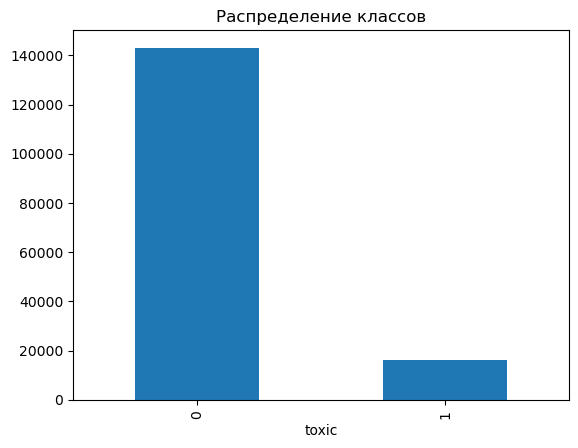

In [6]:
toxic_comments['toxic'].value_counts().plot(kind='bar', title='Распределение классов');


Наблюдается сильный дисбаланс классов, что в будущем нужно будет учитывать при обучении моделей

Посмотрим на наличие дубликатов и пропусков

In [7]:
print('-----------------------------------------------------------------')

print('Количество явных Дубликатов -', toxic_comments.duplicated().sum())

print('-----------------------------------------------------------------')

print('Количество Пропусков:')
display(toxic_comments.isna().sum())

-----------------------------------------------------------------
Количество явных Дубликатов - 0
-----------------------------------------------------------------
Количество Пропусков:


Unnamed: 0    0
text          0
toxic         0
dtype: int64

### Выводы по разделу 1



1. На вход мы получили датасет соостоящий из трех столбцов `Unnamed: 0`, `text`, `toxic` и 159292 строк. 

   - В столбце `text` находятся интересующие нас комментарии, из которых далее мы сформируем признаки, принимаемые моделями.
   - В столбце `toxic` находится целевой признак, обозначемый в случае положительного комментария "1", в случае отрицательного "0".
   - В столбце `Unnamed: 0` фактически дублируются индексы, поэтому для дальнейших исследований он нам не нужен поэтому мы его удалим
   
2. В данных не обнаружено не дубликатов, ни пропусков

3. В данных присуствует сильный дисбаланс классов, поэтому при обучении моделей нужно будет это учитывать

4. В текстах комментариев помимо букв английского алфавита присутствуют лишние знаки, поэтому при подготовки данных тексты нужно будет почистить
   



## Подготовка данных

Удалим столбец Unnamed: 0, так как он фактически дублирует индексы

In [8]:
toxic_comments = toxic_comments.drop(['Unnamed: 0'], axis=1)

Очистим текст от лишних символов. Для этого напишем функцию с использованием регулрных выражений, которая оставит в тексте только символы английского алфавита и пробелы

In [9]:
def clear_text(text):
    clear_list = re.sub(r'[^a-zA-Z ]', ' ', text)
    clear_text = " ".join(clear_list.split())
    return clear_text

Применим функцию

In [10]:
toxic_comments['text'] = toxic_comments['text'].apply(clear_text)

In [11]:
toxic_comments.head()

,text,toxic
0,Explanation Why the edits made under my userna...,0
1,D aww He matches this background colour I m se...,0
2,Hey man I m really not trying to edit war It s...,0
3,More I can t make any real suggestions on impr...,0
4,You sir are my hero Any chance you remember wh...,0


Лемматизируем текст с помощью библиотеки WordNet:

In [12]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,               #прилагательное
                "N": wordnet.NOUN,              #существительное
                "V": wordnet.VERB,              #глагол
                "R": wordnet.ADV                #наречие
               }  
    return tag_dict.get(tag, wordnet.NOUN)


m = WordNetLemmatizer()

def lemmatize(text):
    text = [m.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    return ' '.join(text)


Применим функцию

In [13]:
toxic_comments['text'] = toxic_comments['text'].apply(lemmatize)

In [14]:
toxic_comments.head()

,text,toxic
0,Explanation Why the edits make under my userna...,0
1,D aww He match this background colour I m seem...,0
2,Hey man I m really not try to edit war It s ju...,0
3,More I can t make any real suggestion on impro...,0
4,You sir be my hero Any chance you remember wha...,0


Разобьем выборки

In [15]:
train, test = train_test_split(toxic_comments, test_size=0.2, random_state=12345)
print(train.shape, test.shape)

(127433, 2) (31859, 2)


Создадим корпус текстов и целевой признак для каждой выборки (train и test):

In [16]:
corpus_train = train['text'].values
corpus_test = test['text'].values

target_train = train['toxic']
target_test = test['toxic']

print(corpus_train.shape, corpus_test.shape)
print(target_train.shape, target_test.shape)

(127433,) (31859,)
(127433,) (31859,)


Вычислим TF-IDF для корпуса текстов, указав стоп-слова:

In [17]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(min_df=2, stop_words=list(stopwords)) 
tf_idf_train = count_tf_idf.fit_transform(corpus_train) 
tf_idf_test = count_tf_idf.transform(corpus_test) 

print("Размер матрицы:", tf_idf_train.shape)
print("Размер матрицы:", tf_idf_test.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kseni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размер матрицы: (127433, 55867)
Размер матрицы: (31859, 55867)


### Выводы по разделу 2

1. Из датасета удалили не информативный столбец `Unnamed: 0`

2. Очистили с помощью функции и регулярных выражений тексты от лишних символов. Оставили только буквы английского алфавита, как строчные, так и прописные, а также пробелы

3. Лемматизировали тексты с помощью `WordNetLemmatizer`. Сделали это для того, чтобы унифицировать слова в имеющихся данных, чтобы различные формы одного слова считалисб одним и тем же термином. Это поволяет нам упростить анализ этих текстов и снизить размерность данных

4. Далее разбили наша датасет на обучающую и тестовую выборки в соотношении 80/20. Тренировочная выборка имеет размер (127433, 2), тестовая выборка имеет размер (31859, 2)

5. Создали корпус текстов и выделили целевой признак, находящийся в столбце `toxic`. 

6. Вычислили TF-IDF для корпуса текстов, указав стоп-слова. Получили матрицу TF-IDF для обучающей выборки равную (127433, 56449), и матрицу TF-IDF для тестовой выборки равную (31859, 56449)

## Обучение

В качестве обучаемых моделей выбрали модели:
- LogisticRegression;
- RandomForestClassifier;
- CatBoostClassifier

Далее обучим каждую из них, вычислим значения F1 как для обучающей, так и для тестовой выборок. Выберем наилучшую модель.

Перебор гиперпараметров будем осуществлять с помощью `RandomizedSearchCV`.

###  Логистическая регрессия

In [18]:
%%time

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))), ('lrc', LogisticRegression())])
parameters = {
    'tfidf__min_df': range(1, 3, 1),
    'lrc__C': [5, 15],
    'lrc__penalty': ['l1', 'l2'],     
    'lrc__class_weight': (['balanced'])
}

grid = RandomizedSearchCV(pipe, param_distributions=parameters, verbose=5, scoring='f1') 
grid.fit(corpus_train, target_train) 

f1_train = round(abs(grid.best_score_), 3)
print()
print(f"Значение F1 модели на трейне: {f1_train}")
print(f"Оптимальные гиперпараметры для модели: {grid.best_params_}")
print()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=1;, score=nan total time=   3.3s
[CV 2/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=1;, score=nan total time=   3.2s
[CV 3/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=1;, score=nan total time=   3.3s
[CV 4/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=1;, score=nan total time=   3.3s
[CV 5/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=1;, score=nan total time=   3.4s
[CV 1/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=2;, score=nan total time=   3.3s
[CV 2/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=2;, score=nan total time=   3.4s
[CV 3/5] END lrc__C=5, lrc__class_weight=balanced, lrc__penalty=l1, tfidf__min_df=2;, score=nan total time=   3.2s
[CV 4/5] END lrc__C=

### RandomForestClassifier

In [19]:
%%time

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))), ('rfc', RandomForestClassifier(random_state=12345))])
parameters = {
    'rfc__n_estimators': [90, 150],
    'tfidf__min_df': range(1, 3, 1)
}

grid = RandomizedSearchCV(pipe, param_distributions=parameters, scoring='f1', verbose=5, n_jobs=-1) 
grid.fit(corpus_train, target_train) 

f1_train = round(abs(grid.best_score_), 3)
rf_best_params = grid.best_params_
print()
print(f"Значение F1 модели на трейне: {f1_train}")
print(f"Оптимальные гиперпараметры для модели: {grid.best_params_}")
print()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

### Модель CatBoostClassifier

In [22]:
%%time

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))),
                 ('cbc', CatBoostClassifier(random_state=12345, verbose=False))])
parameters = {
    'cbc__iterations': [100, 500],
    'tfidf__min_df': range(1, 3, 1)
}

grid = RandomizedSearchCV(pipe, param_distributions=parameters, scoring='f1', verbose=5, n_jobs=-1) 
grid.fit(corpus_train, target_train) 

f1_train = round(abs(grid.best_score_), 3)
rf_best_params = grid.best_params_

print()
print(f"Значение F1 модели на трейне: {f1_train}")
print(f"Оптимальные гиперпараметры для модели: {grid.best_params_}")
print()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: 

## Проверка наилучшей модели на тестовой выборке

По результатам исслдоевания различных моделей получено, что наилучший показатель F1 меры имеет модель Логистической регрессии. Проверим эту модель на тестовой выборке с наилучшими гиперпараметрами

In [24]:
%%time

pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))), ('lrc', LogisticRegression())])
pipe.set_params(**grid.best_params_)
pipe.fit(corpus_train, target_train)

target_predict = pipe.predict(corpus_test)
f1_test = round(f1_score(target_test, target_predict), 3)
print(f"F1 модели на тесте: {f1_test}")
print()

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

Таким образом, получили что F1 мера на тестовой выборке для модели логистической регрессии получилась равной 0,761

## Выводы

Нашей задачей было найти и обучить модель классифицировать комментарии на позитивные и негативные. Необходимо было построить модель со значением метрики качества *F1* не меньше 0.75. 

Для решения поставленной задачи мы выгрузили и подготовили данные, состоящие из текстов комментариев, которые определены как положительные или негативные. Очистили тексты от лишних символом, лемматизировали его, подготовли тексты в качестве признаков.

В качестве исследуемых моделей выбрали модели:
- LogisticRegression;
- RandomForestClassifier;
- CatBoostClassifier

Значения F1 получились следующими:
- для LogisticRegression значение на обучающей выборке F1=0.755, на тестовой выборке F1=0.761
- для RandomForestClassifier значение на обучающей выборке F1=0.725, на тестовой выборке F1=0.728
- для CatBoostClassifier значение на обучающей выборке F1=0.743, на тестовой выборке F1=0.759

Очевидно, что наилучшем результатом обладает модель LogisticRegression, так как помимо достигнутого порога F1=0.75, данная модель выполнила вычисления горзда быстрее остальных, что так же не маловажно при выборе подходящей модели.